# Estimation of overdamped model
First download the data and load the trajectories. Don't forget to adapt the location of the file

In [ ]:
import numpy as np
import folie as fl

data = fl.Trajectories(dt=1.0e-3)
n=1 # Let's use the first molecule.
trj = np.loadtxt(f"DATA")
data.append(trj.reshape(-1,1))
print(data) #Let's check what we have

Then define a model, here we are going to use the default 1D overdamped model. We can then fit the model. To start we use a simple KramersMoyal estimation

In [2]:
domain = fl.MeshedDomain.create_from_range(np.linspace(data.stats.min , data.stats.max , 10).ravel())
model = fl.models.OverdampedSplines1D(domain=domain)
estimator = fl.KramersMoyalEstimator(model)
model = estimator.fit_fetch(data)

We can then plot the force and diffusion profile

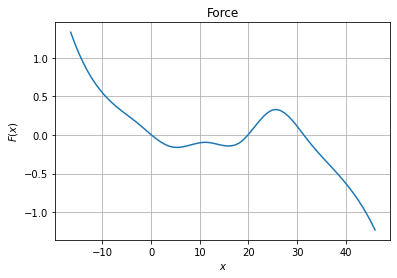

In [6]:
import matplotlib.pyplot as plt

xfa = np.linspace(np.min(trj),np.max(trj),75)
fig, ax = plt.subplots(1, 1)
# Force plot
ax.set_title("Force")
ax.set_xlabel("$x$")
ax.set_ylabel("$F(x)$")
ax.grid()
ax.plot(xfa, model.drift(xfa.reshape(-1, 1)))


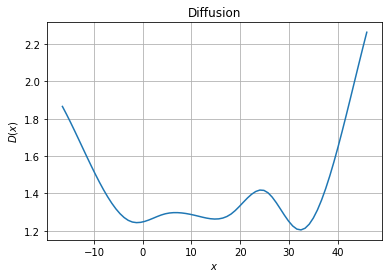

In [4]:
fig, ax = plt.subplots(1, 1)
# Diffusion plot
ax.set_title("Diffusion")
ax.grid()
ax.set_xlabel("$x$")
ax.set_ylabel("$D(x)$")
ax.plot(xfa, model.diffusion(xfa.reshape(-1, 1)))

But also obtain the free energy profile. The free energy profile $V(x)$ is related to the force $F(x)$ and the diffusion $D(x)$ from

$$ F(x) = -D(x) \nabla V(x) + \mathrm{div} D(x)$$

The relation can then be inverted to obtain the free energy profile.

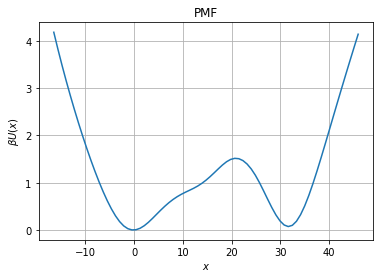

In [5]:
pmf=fl.analysis.free_energy_profile_1d(model, xfa)
fig, ax = plt.subplots(1, 1)
# Diffusion plot
ax.set_title("PMF")
ax.grid()
ax.set_xlabel("$x$")
ax.set_ylabel("$\\beta U(x)$")
ax.plot(xfa, pmf)

Since there is two well, we can also compute the mean first passage time to go from point x to 0.

In [1]:
x_mfpt, mfpt = fl.analysis.mfpt_1d(model_simu, 0, [-20.0, 50.0], Npoints=500)
fig, ax = plt.subplots(1, 1)
# MFPT plot
ax.set_title("MFPT from x to 0")
ax.grid()
ax.set_xlabel("$x$")
ax.set_ylabel("$MFPT(x,0)$")
ax.plot(x_mfpt, mfpt)

NameError: name 'fl' is not defined

## Parallel execution


See https://scikit-learn.org/stable/computing/parallelism.html for an overview of available options.

Likelihood estimator are parallelized using n_jobs=<wanted number of cores> with computation of likelihood being parallelized over trajectories.